In [12]:
import random
import matplotlib.pylab as pyl
import math
from scipy.optimize import root_scalar, RootResults

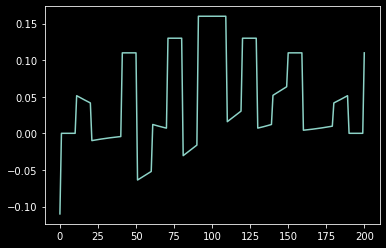

In [13]:
def fn(x):
    match abs(int(x*10)):
        case 0:
            return .16
        case 2:
            return .13
        case 5:
            return .11
        case 9:
            return 1e-4
        case _:
            return x * (fn(x/2) if x < 100 else math.exp(x*x))

pyl.plot([fn(x/100) for x in range(-100,101)])

In [14]:
def calculate_fitness(population):
    if type(population) == list:
        return [(abs(fn(x)),x) for x in population]
    else:
        return abs(fn(population))

def crossover_function(a, b):
    rand_fun = random.random
    rng = rand_fun()
    if rng < .4888:
        return (b-a)/2 + a*.1
    elif rng < .88:
        return (b-a)/2 + b*.1
    else:
        return (b-a)/2 + rand_fun()*.1

def crossover(population, new_population_size: int):
    rng = lambda: random.randint(0, len(population)-1)
    choose = lambda: population[rng()]
    xs = [crossover_function(choose(), choose()) for i in range(new_population_size)]
    return xs

In [18]:
best_result: RootResults = root_scalar(fn, bracket=[-1.0, 1.0])
print(f"Best score:\n{best_result}\nLowest value @ root: {fn(best_result.root)}")
fn(-0.6000000000000000), fn(-0.9999914207085816)

Best score:
      converged: True
           flag: 'converged'
 function_calls: 59
     iterations: 58
           root: -0.6000000000007168
Lowest value @ root: -0.004320000000015484


(-0.00432, 0.0001)

In [28]:
def run_ga(population_size = 1000, domain_size = 100, population_percent_keep = 0.1, iterations=1_000_0):
    domain = [i/10 for i in range(-domain_size,domain_size+1)]
    population = [domain[random.randint(0, len(domain)-1)] for _ in range(population_size)]

    for its in range(1_000_0):
        population_by_fitness = [y for _, y in sorted(calculate_fitness(population))]

        best_score = calculate_fitness(population_by_fitness[0])
        if best_score <= 1e-4:
            print(f'{population_by_fitness[0]} scored {best_score} in {its} iterations')
            break

        next_generation = population_by_fitness[:int(population_size*population_percent_keep)]
        top_half = population_by_fitness[:int(population_size*0.5)]

        next_generation.extend(crossover(top_half, int(population_size*(1.0 - population_percent_keep))))

        population = next_generation

run_ga(population_size=5, iterations=1_000_000_000_000)

-0.903 scored 0.0001 in 2 iterations
